📊 Linear Regression: {'RMSE': np.float64(33468.20695232204), 'R2': 0.3035148284829121}
🌲 Random Forest: {'RMSE': np.float64(7903.0354018491635), 'R2': 0.9611639691253364}
🚀 XGBoost: {'RMSE': np.float64(7467.111000387552), 'R2': 0.9653301312568895}
🔍 SHAP Interpretation for XGBoost


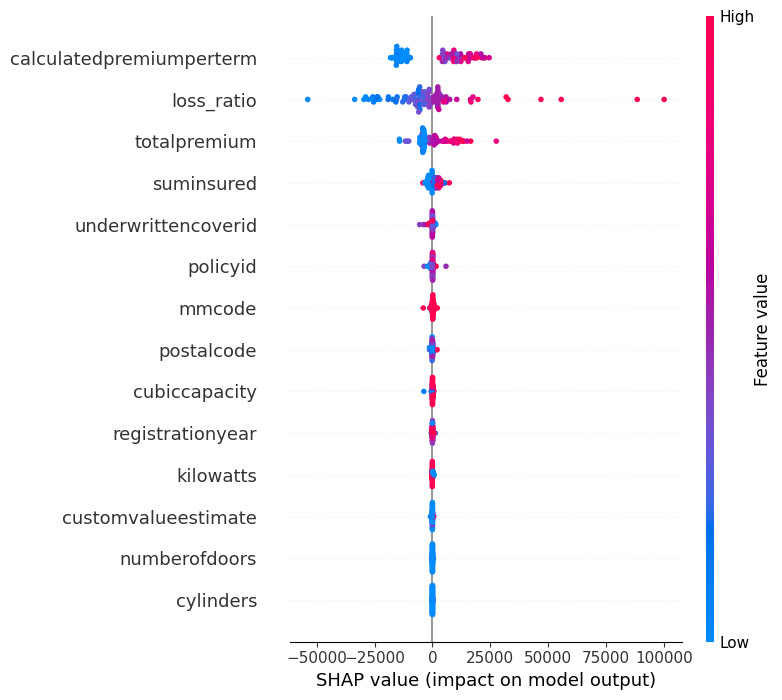

In [10]:
import sys
import os
import numpy as np
import importlib
sys.path.append(os.path.abspath(".."))
import src.modeling.data_preprocessor
importlib.reload(src.modeling.data_preprocessor)

import src.modeling.model_builder
importlib.reload(src.modeling.model_builder)

import src.modeling.model_evaluator
importlib.reload(src.modeling.model_evaluator)

import src.modeling.interpreter
importlib.reload(src.modeling.interpreter)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from src.modeling.data_preprocessor import ModelingDataPreprocessor
from src.modeling.model_builder import ModelBuilder
from src.modeling.model_evaluator import ModelEvaluator
from src.modeling.interpreter import ModelInterpreter

# Load and prepare data
prep = ModelingDataPreprocessor()
prep.filter_claims()
X, y = prep.prepare_features("totalclaims")
X_train, X_test, y_train, y_test = prep.split_data(X, y)

#  Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

lr_eval = ModelEvaluator(lr, X_train)
print("Linear Regression:", lr_eval.evaluate(y_test, lr_preds))

#  Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_eval = ModelEvaluator(rf, X_train)
print(" Random Forest:", rf_eval.evaluate(y_test, rf_preds))

#  XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

xgb_eval = ModelEvaluator(xgb, X_train)
print(" XGBoost:", xgb_eval.evaluate(y_test, xgb_preds))

# Interpret best model (XGBoost)
print(" SHAP Interpretation for XGBoost")
xgb_eval.explain_with_shap()


